# Exploratory Data Analysis: Chicago Crime Data (Part 1)

## Dataset Overview
This notebook explores the Chicago Crime dataset from 2001 to present (current snapshot: 2024).

**Source**: [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

**Data File**: `data/Crimes_-_2001_to_Present_20251118.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 1. Data Loading & Initial Inspection


In [2]:
df = pd.read_csv('data/Crimes_-_2001_to_Present_20251118.csv')
df.shape

(258077, 22)

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13707060,JH560826,12/30/2024 11:58:00 PM,105XX S OGLESBY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,7,51,08B,1193859.0,1835648.0,2024,11/02/2025 03:41:09 PM,41.703958,-87.565731,"(41.703957798, -87.565731377)"
1,13718041,JH560798,12/30/2024 11:44:00 PM,029XX N AVERS AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,31,21,14,1150212.0,1919339.0,2024,05/17/2025 03:40:52 PM,41.934574,-87.723384,"(41.934574027, -87.72338424)"
2,13707061,JH560794,12/30/2024 11:42:00 PM,041XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,3,38,08B,1178727.0,1877584.0,2024,05/17/2025 03:40:52 PM,41.819392,-87.619868,"(41.819391545, -87.619867813)"
3,13707123,JH560916,12/30/2024 11:40:00 PM,005XX E 48TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,3,38,07,1180530.0,1873307.0,2024,11/02/2025 03:41:09 PM,41.807614,-87.613385,"(41.80761384, -87.613385208)"
4,13706973,JH560790,12/30/2024 11:38:00 PM,037XX W CERMAK RD,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,...,24,29,18,1151564.0,1889117.0,2024,11/02/2025 03:41:09 PM,41.851615,-87.719211,"(41.851615291, -87.719210554)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258077 entries, 0 to 258076
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    258077 non-null  int64  
 1   Case Number           258077 non-null  object 
 2   Date                  258077 non-null  object 
 3   Block                 258077 non-null  object 
 4   IUCR                  258077 non-null  object 
 5   Primary Type          258077 non-null  object 
 6   Description           258077 non-null  object 
 7   Location Description  256982 non-null  object 
 8   Arrest                258077 non-null  bool   
 9   Domestic              258077 non-null  bool   
 10  Beat                  258077 non-null  int64  
 11  District              258077 non-null  int64  
 12  Ward                  258077 non-null  int64  
 13  Community Area        258077 non-null  int64  
 14  FBI Code              258077 non-null  object 
 15  

## 2. Schema & Data Dictionary


In [5]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## 3. Missing Data Analysis


In [6]:
missing = df.isnull().sum()
missing[missing > 0]

Location Description    1095
X Coordinate            1229
Y Coordinate            1229
Latitude                1229
Longitude               1229
Location                1229
dtype: int64

## 4. Summary Statistics


In [7]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.580770e+05,258077.000000,258077.000000,258077.000000,258077.000000,2.568480e+05,2.568480e+05,258077.0,256848.000000,256848.000000
mean,1.349119e+07,1157.143767,11.341611,23.188250,36.183360,1.165284e+06,1.887735e+06,2024.0,41.847528,-87.668936
std,6.537415e+05,709.261577,7.087348,13.950579,21.610619,1.615931e+04,3.153816e+04,0.0,0.086724,0.058842
min,2.793200e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.0,41.644590,-87.934567
25%,1.342513e+07,533.000000,5.000000,10.000000,22.000000,1.154008e+06,1.860557e+06,2024.0,41.772692,-87.709879
50%,1.352127e+07,1034.000000,10.000000,23.000000,32.000000,1.167130e+06,1.894416e+06,2024.0,41.866094,-87.661853
75%,1.361636e+07,1732.000000,17.000000,34.000000,53.000000,1.176638e+06,1.910460e+06,2024.0,41.910074,-87.627352
max,1.403100e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,2024.0,42.022548,-87.524531


In [8]:
df['Primary Type'].value_counts().head(10)


Primary Type
THEFT                  60399
BATTERY                46018
CRIMINAL DAMAGE        28449
ASSAULT                23414
MOTOR VEHICLE THEFT    21645
OTHER OFFENSE          17056
DECEPTIVE PRACTICE     16068
ROBBERY                 9087
BURGLARY                8403
WEAPONS VIOLATION       7807
Name: count, dtype: int64

## 5. Temporal Analysis


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

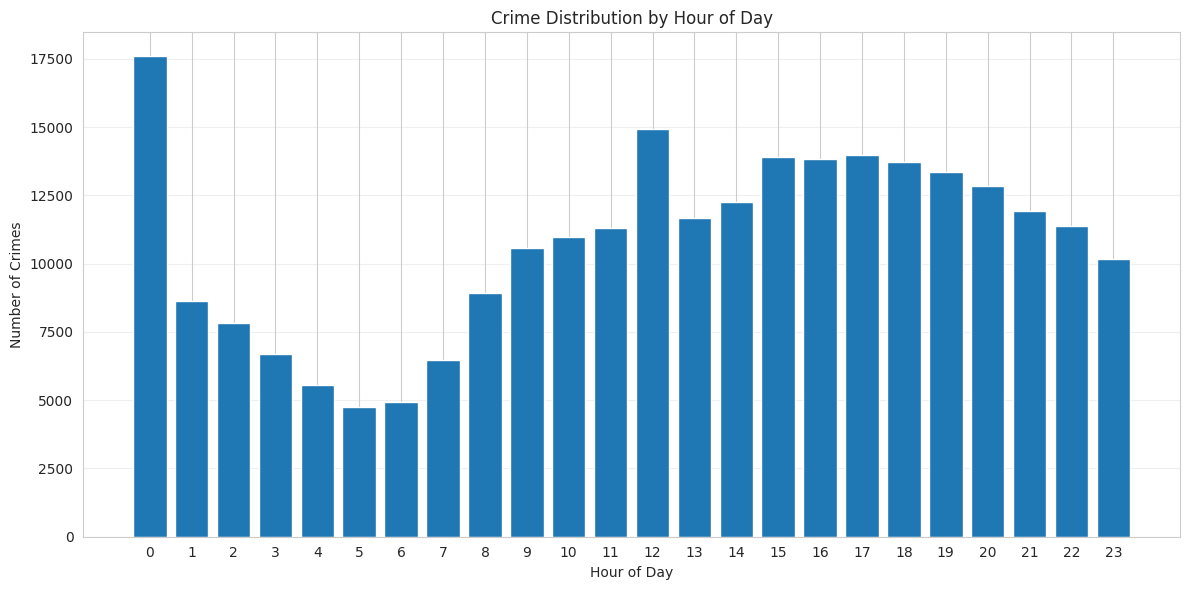

In [10]:
plt.figure(figsize=(12, 6))
hourly_counts = df['Hour'].value_counts().sort_index()
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Crime Distribution by Hour of Day')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

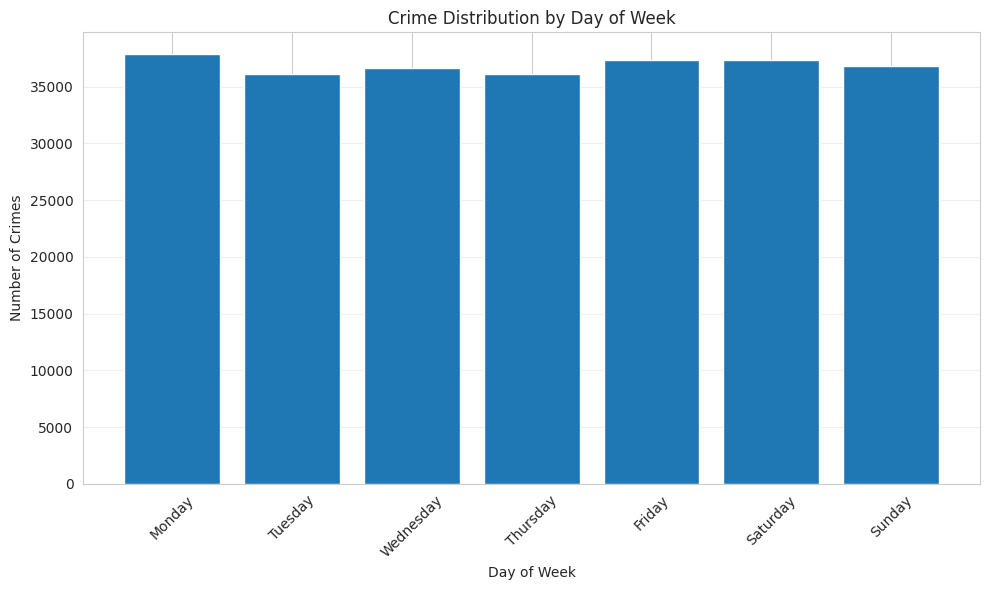

In [11]:
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Crime Distribution by Day of Week')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

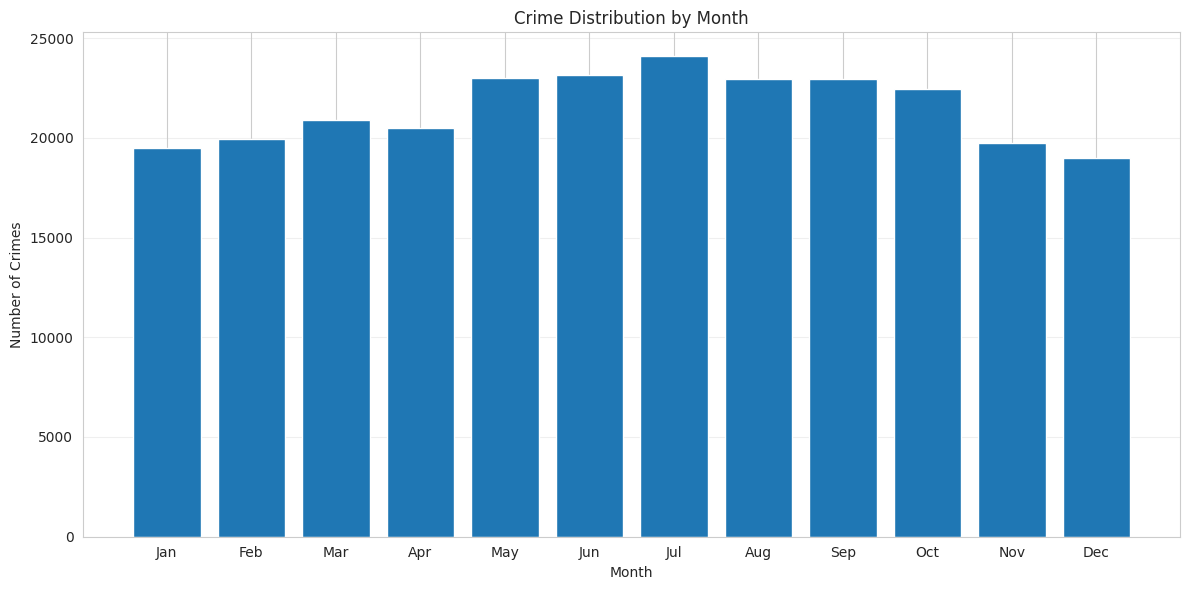

In [12]:
plt.figure(figsize=(12, 6))
month_counts = df['Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Distribution by Month')
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Crime Type Analysis


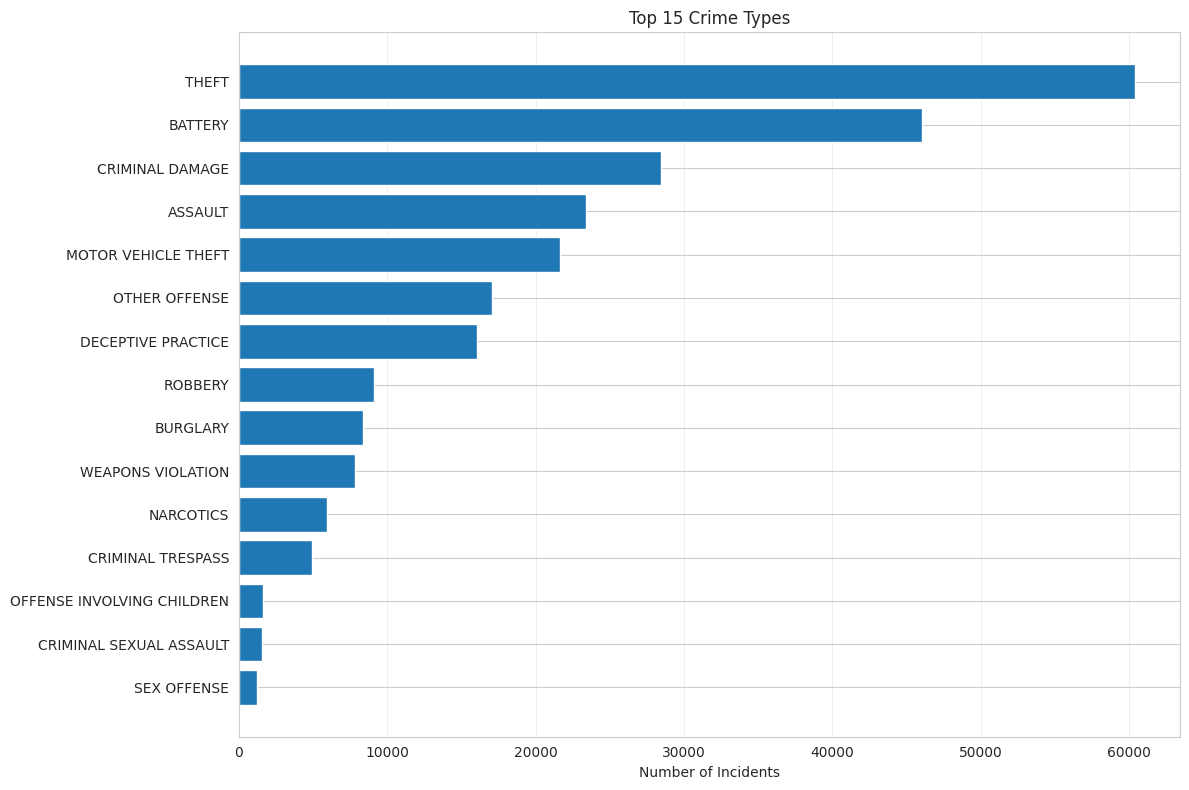

In [13]:
plt.figure(figsize=(12, 8))
top_crimes = df['Primary Type'].value_counts().head(15)
plt.barh(range(len(top_crimes)), top_crimes.values)
plt.yticks(range(len(top_crimes)), top_crimes.index)
plt.xlabel('Number of Incidents')
plt.title('Top 15 Crime Types')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Geospatial Analysis


In [14]:
valid_coords = df[(df['Latitude'].notna()) & (df['Longitude'].notna())]
len(valid_coords) / len(df)

0.9952378553687465

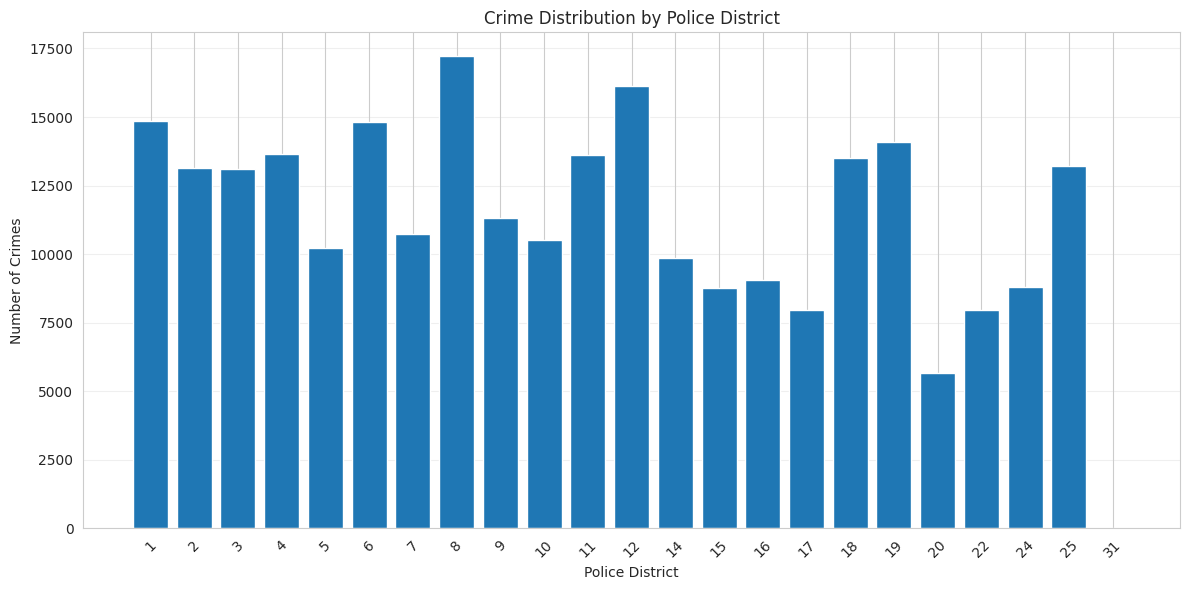

In [15]:
plt.figure(figsize=(12, 6))
district_counts = df['District'].value_counts().sort_index()
plt.bar(district_counts.index.astype(str), district_counts.values)
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.title('Crime Distribution by Police District')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Arrest & Domestic Violence Analysis


In [16]:
df['Arrest'] = df['Arrest'].astype(str).str.lower() == 'true'
df['Domestic'] = df['Domestic'].astype(str).str.lower() == 'true'

arrest_by_type = df.groupby('Primary Type')['Arrest'].agg(['sum', 'count'])
arrest_by_type['Arrest Rate'] = (arrest_by_type['sum'] / arrest_by_type['count']) * 100
arrest_by_type.sort_values('Arrest Rate', ascending=False).head(10)

,sum,count,Arrest Rate
Primary Type,,,
GAMBLING,22,22,100.000000
CONCEALED CARRY LICENSE VIOLATION,191,195,97.948718
NARCOTICS,5751,5971,96.315525
PROSTITUTION,294,307,95.765472
LIQUOR LAW VIOLATION,184,194,94.845361
PUBLIC INDECENCY,8,9,88.888889
INTERFERENCE WITH PUBLIC OFFICER,610,691,88.277858
WEAPONS VIOLATION,4784,7807,61.278340
OTHER NARCOTIC VIOLATION,3,5,60.000000


In [17]:
domestic_by_type = df.groupby('Primary Type')['Domestic'].agg(['sum', 'count'])
domestic_by_type['Domestic Rate'] = (domestic_by_type['sum'] / domestic_by_type['count']) * 100
domestic_by_type.sort_values('Domestic Rate', ascending=False).head(10)

,sum,count,Domestic Rate
Primary Type,,,
OFFENSE INVOLVING CHILDREN,1252,1655,75.649547
BATTERY,24378,46018,52.974923
STALKING,248,515,48.155340
KIDNAPPING,36,95,37.894737
OTHER OFFENSE,6105,17056,35.793856
ASSAULT,6613,23414,28.243786
SEX OFFENSE,270,1243,21.721641
OBSCENITY,13,60,21.666667
CRIMINAL SEXUAL ASSAULT,308,1596,19.298246


## 9. Outlier Detection


In [18]:
valid_coords = df[(df['Latitude'].notna()) & (df['Longitude'].notna())].copy()
outliers = valid_coords[
    (valid_coords['Latitude'] < 41.6) | (valid_coords['Latitude'] > 42.0) |
    (valid_coords['Longitude'] < -87.9) | (valid_coords['Longitude'] > -87.5)
]
len(outliers)

6151

## 10. Early Hypotheses

- Crime rates vary significantly by time of day, day of week, and month
- Crime is not uniformly distributed across police districts and community areas
- Arrest rates vary by crime type and severity
- Domestic violence incidents show different patterns than non-domestic crimes
- Location type (street, residence, apartment) correlates with crime type
- Certain community areas have higher crime rates

## 11. Data Quality Summary


In [19]:
# summary
f"Records: {len(df):,}, Missing coords: {df['Latitude'].isna().sum():,}, Crime types: {df['Primary Type'].nunique()}"

'Records: 258,077, Missing coords: 1,229, Crime types: 31'